In [1]:
# Notebook to explore more serious convolutional networks 
# i.e. includes analysis of training and test accuracies

In [1]:
# Example using several models 
from core_functions import Data, Trainer, plot_train, test_accuracy
from networks import CNN_Simple, CNN_Dense
# dataPath = "./second_collection_triggs_rels_32.npz"
dataPath = "./five_people_triggs_rels_32.npz"
D = Data(dataPath, triggers=True, releases=False)
D.split()
D.normalize()
D.tensors_to_device()
D.print_shapes()

Train, test and validation data normalized to:
[1.]
[0.99839183]
[1.00500158]
Using Device:  cpu , dtype:  torch.float32

Raw data shape:  (31090, 1, 32) 
Labels shape:  (31090,) 
Unique labels:  [0 1 2 3 4] 
Shape of test set: (4664, 1, 32) 
Shape of train set: (22462, 1, 32) 
Shape of validation set: (3964, 1, 32) 
Fraction of single class in test set:  0.2388507718696398 
dtype of inputs:  torch.float32


End of epoch 1:loss_tr=0.911, loss_val=0.915, train=61.7%, val=61.7%
End of epoch 2:loss_tr=0.797, loss_val=0.818, train=67.2%, val=66.4%
End of epoch 3:loss_tr=0.758, loss_val=0.793, train=69.5%, val=68.6%
End of epoch 4:loss_tr=0.693, loss_val=0.725, train=72.4%, val=72.1%
End of epoch 5:loss_tr=0.676, loss_val=0.712, train=73.1%, val=72.0%
End of epoch 6:loss_tr=0.722, loss_val=0.742, train=71.4%, val=70.4%
End of epoch 7:loss_tr=0.636, loss_val=0.673, train=74.8%, val=73.1%
End of epoch 8:loss_tr=0.647, loss_val=0.683, train=74.3%, val=72.7%
End of epoch 9:loss_tr=0.655, loss_val=0.680, train=73.8%, val=72.3%
End of epoch 10:loss_tr=0.609, loss_val=0.646, train=75.8%, val=74.7%
End of epoch 11:loss_tr=0.606, loss_val=0.647, train=75.5%, val=73.7%
End of epoch 12:loss_tr=0.624, loss_val=0.662, train=75.6%, val=73.5%
End of epoch 13:loss_tr=0.596, loss_val=0.629, train=76.4%, val=75.1%
End of epoch 14:loss_tr=0.621, loss_val=0.649, train=75.0%, val=73.9%
End of epoch 15:loss_tr=0.627

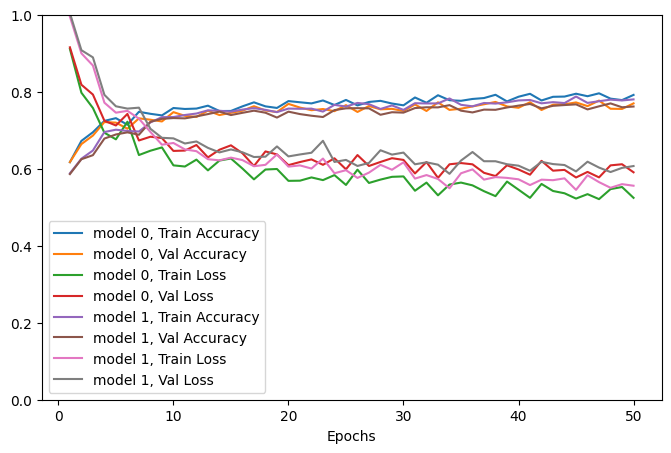

In [2]:
models = [CNN_Simple(input_ch=1, n_filters=8, out_size=5), CNN_Dense(input_ch=1, n_filters=8, out_size=5)]
trainers = [Trainer(D), Trainer(D)]
for model, T in zip(models, trainers):
    T.setup(model, max_epochs=50, batch_size=2*256)
    T.train_model(model)
plot_train(trainers)
test_accuracy(D, models)

Train, test and validation data normalized to:
[1. 1.]
[0.99839183 1.00029337]
[1.00500158 1.00545663]
Using Device:  cpu , dtype:  torch.float32

Raw data shape:  (31090, 2, 32) 
Labels shape:  (31090,) 
Unique labels:  [0 1 2 3 4] 
Shape of test set: (4664, 2, 32) 
Shape of train set: (22462, 2, 32) 
Shape of validation set: (3964, 2, 32) 
Fraction of single class in test set:  0.2388507718696398 
dtype of inputs:  torch.float32


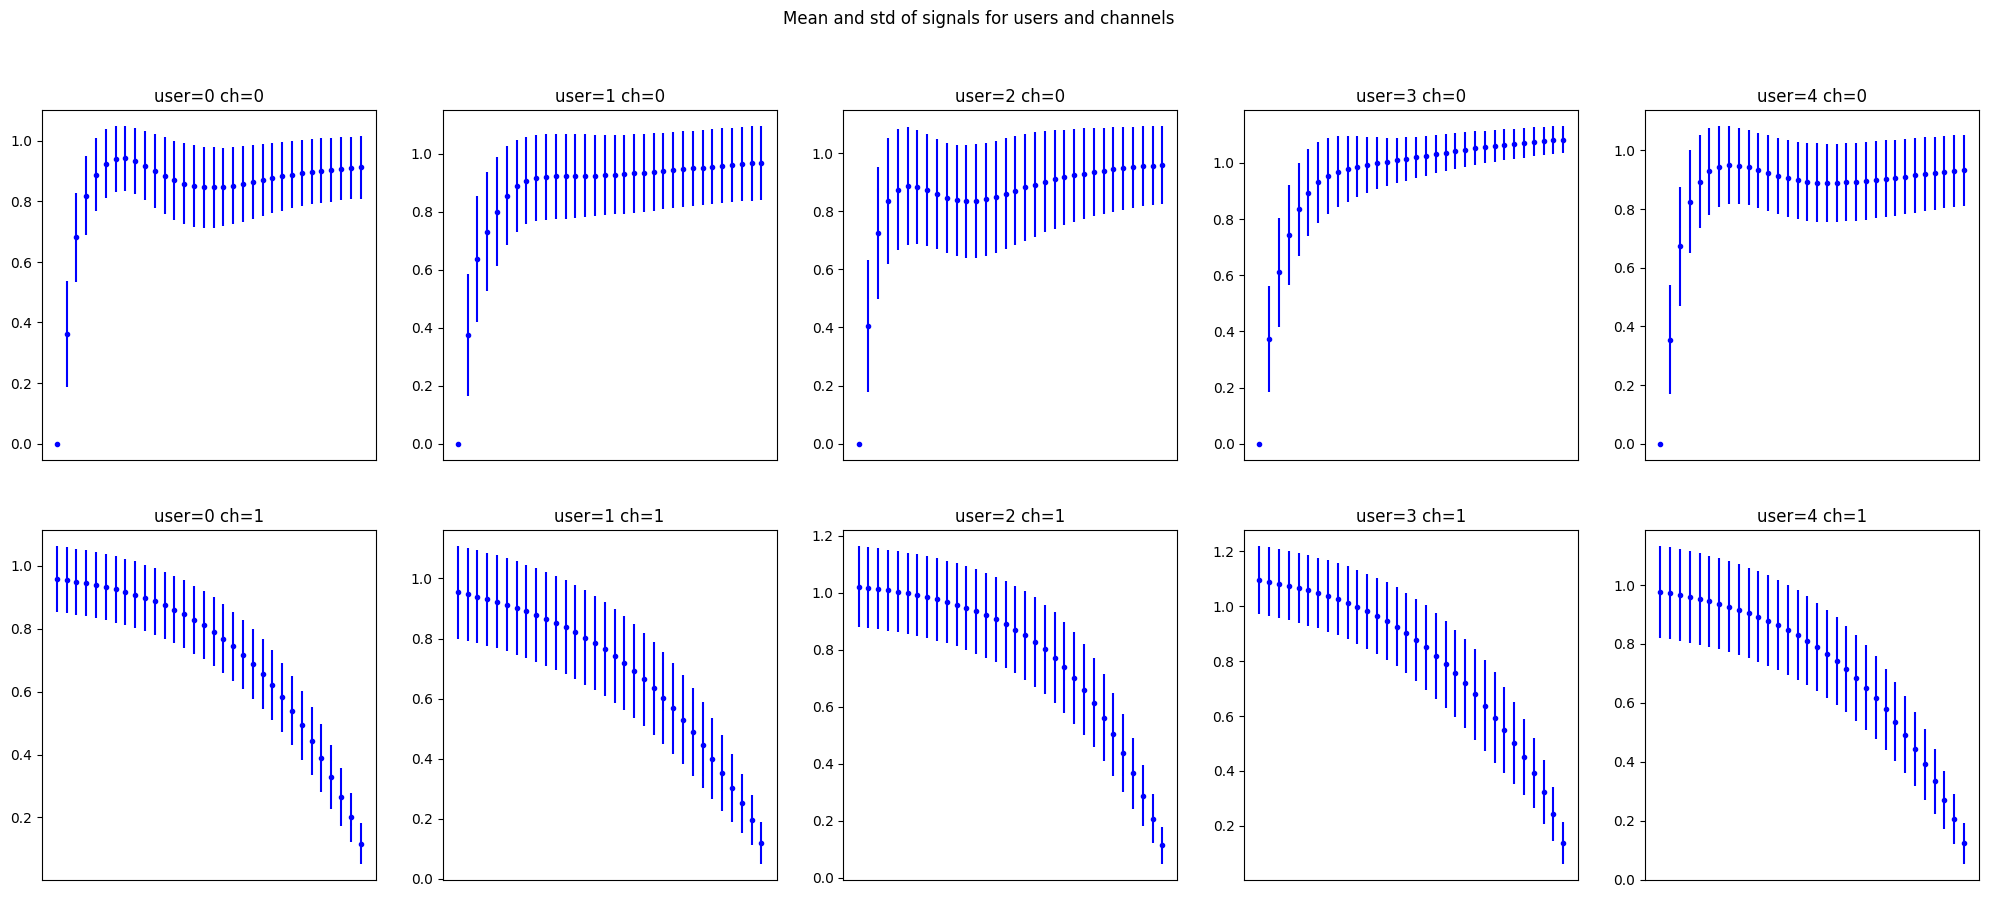

In [3]:
# Use both triggers and releases
from core_functions import Data, Trainer, plot_train, test_accuracy
from networks import CNN_Simple, CNN_Dense
# dataPath = "./second_collection_triggs_rels_32.npz"
dataPath = "./five_people_triggs_rels_32.npz"
D = Data(dataPath, triggers=True, releases=True)
D.split()
D.normalize()
D.tensors_to_device()
D.print_shapes()
D.plot_data()

End of epoch 1:loss_tr=0.865, loss_val=0.869, train=65.0%, val=64.2%
End of epoch 2:loss_tr=0.786, loss_val=0.791, train=67.8%, val=66.6%
End of epoch 3:loss_tr=0.739, loss_val=0.763, train=71.0%, val=69.5%
End of epoch 4:loss_tr=0.668, loss_val=0.691, train=73.9%, val=72.5%
End of epoch 5:loss_tr=0.650, loss_val=0.684, train=75.0%, val=72.5%
End of epoch 6:loss_tr=0.682, loss_val=0.707, train=72.9%, val=71.1%
End of epoch 7:loss_tr=0.622, loss_val=0.670, train=75.9%, val=73.9%
End of epoch 8:loss_tr=0.618, loss_val=0.653, train=76.2%, val=75.1%
End of epoch 9:loss_tr=0.590, loss_val=0.625, train=77.4%, val=74.8%
End of epoch 10:loss_tr=0.589, loss_val=0.634, train=76.9%, val=74.6%
End of epoch 11:loss_tr=0.558, loss_val=0.605, train=78.4%, val=76.2%
End of epoch 12:loss_tr=0.553, loss_val=0.601, train=78.6%, val=76.5%
End of epoch 13:loss_tr=0.558, loss_val=0.603, train=78.7%, val=76.4%
End of epoch 14:loss_tr=0.592, loss_val=0.639, train=76.6%, val=74.5%
End of epoch 15:loss_tr=0.565

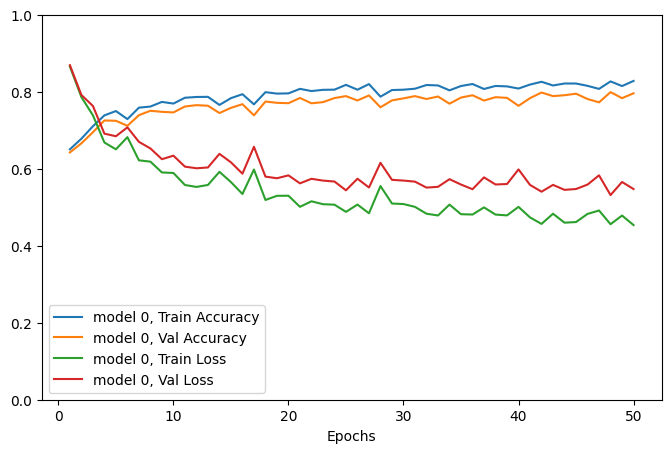

In [4]:
model = CNN_Simple(input_ch=2, n_filters=8, out_size=5)
T = Trainer(D)
T.setup(model, learning_rate=1e-2, weight_decay=1e-3, batch_size=2*256, max_epochs=50)
T.train_model(model)
plot_train([T])
test_accuracy(D, [model])

Train, test and validation data normalized to:
[1.]
[0.99839183]
[1.00500158]
Using Device:  cpu , dtype:  torch.float32

Raw data shape:  (31090, 1, 32) 
Labels shape:  (31090,) 
Unique labels:  [0 1 2 3 4] 
Shape of test set: (9328, 3, 32) 
Shape of train set: (44924, 3, 32) 
Shape of validation set: (7928, 3, 32) 
Fraction of single class in test set:  0.2388507718696398 
dtype of inputs:  torch.float32


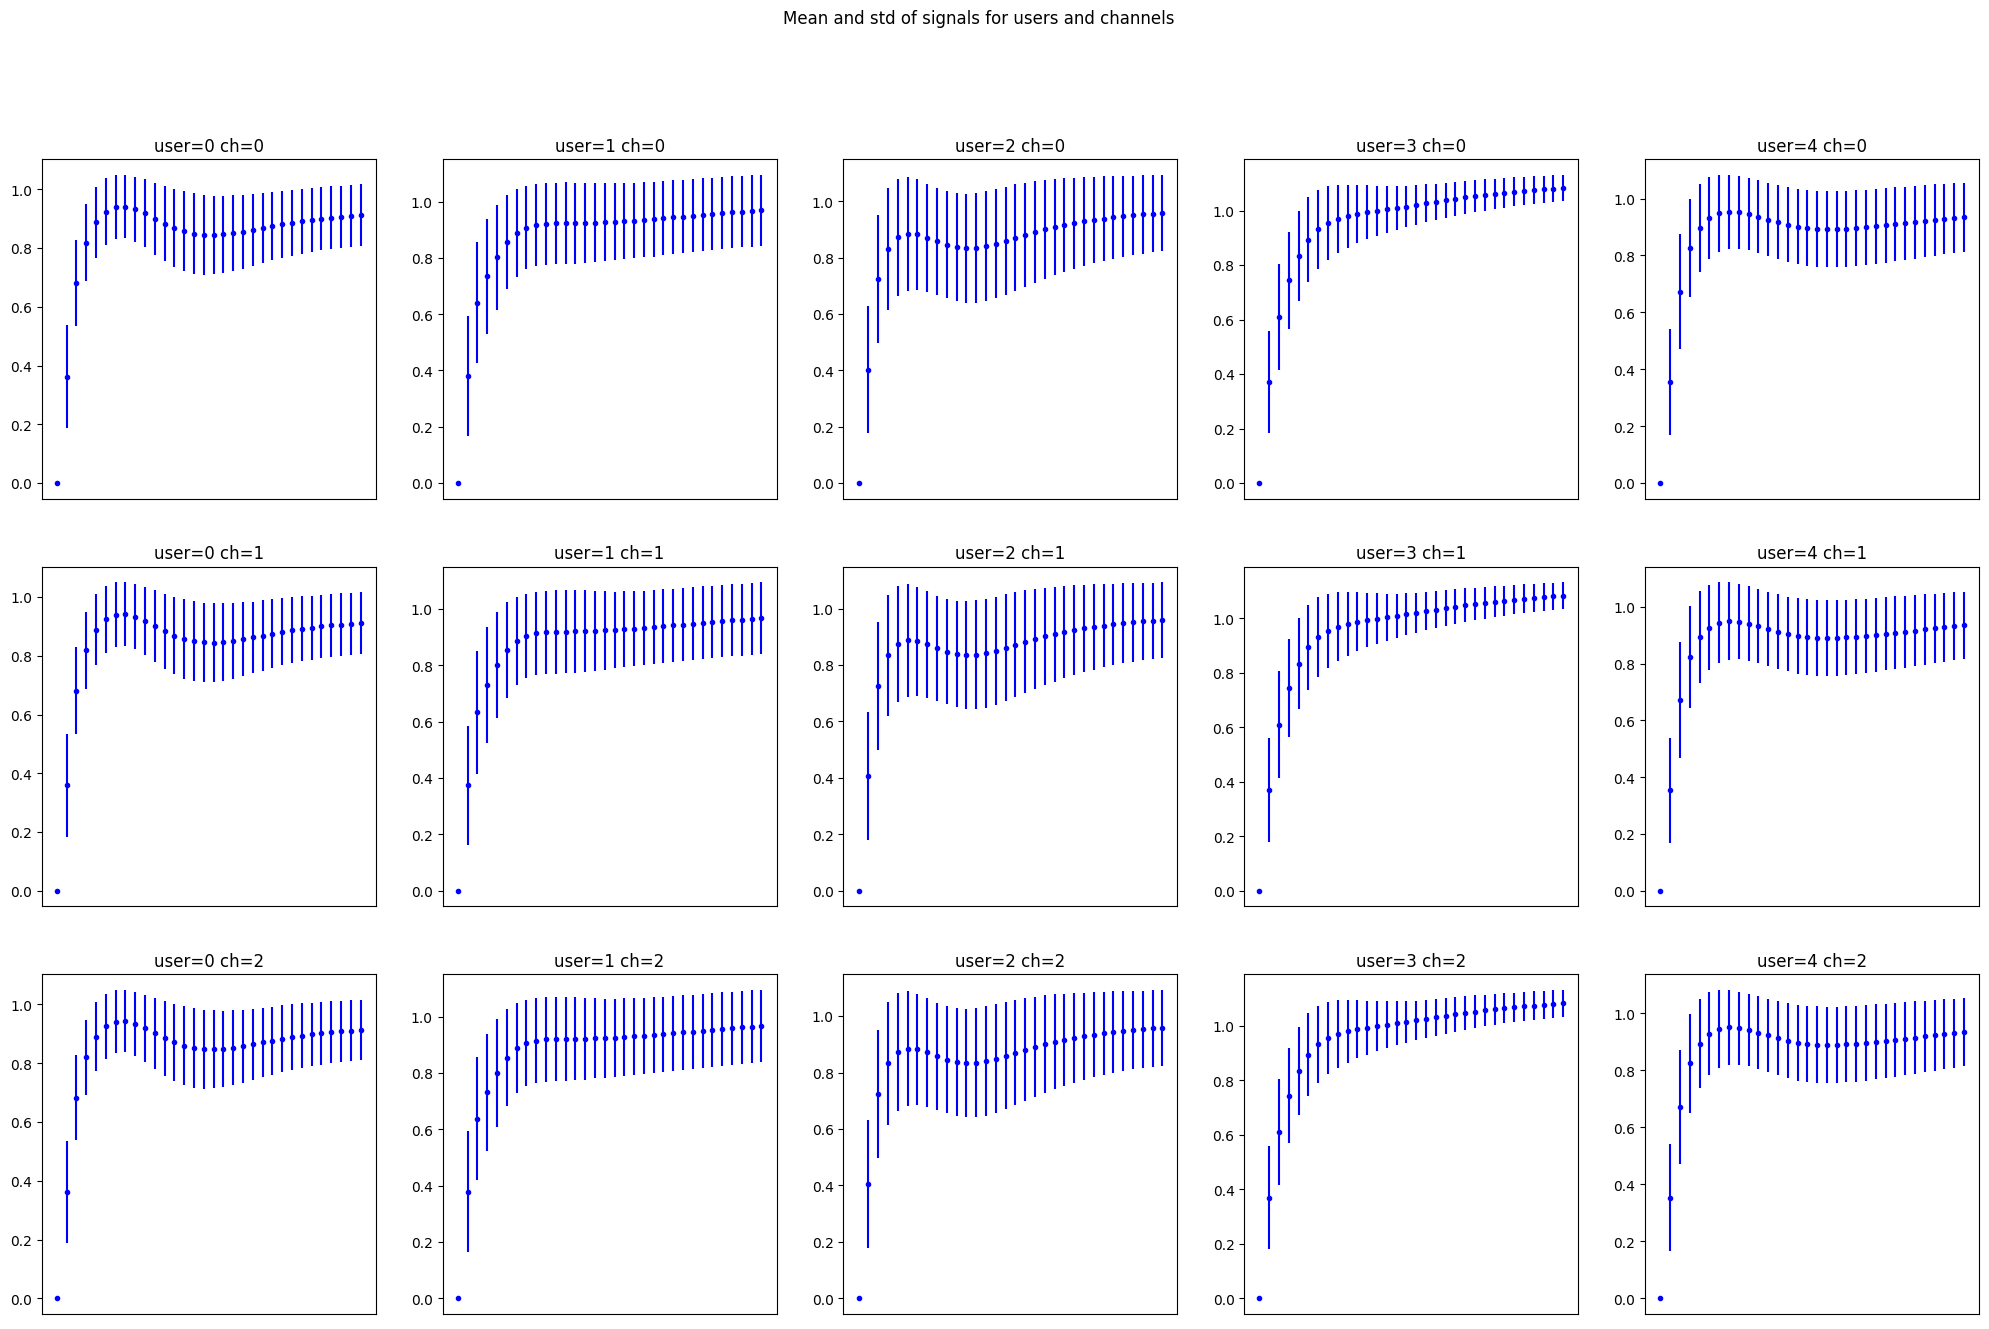

In [1]:
# Look at using several signals, one per channel
from core_functions import Data, Trainer, plot_train, test_accuracy
from networks import CNN_Simple, CNN_Dense
# dataPath = "./second_collection_triggs_rels_32.npz"
dataPath = "./five_people_triggs_rels_32.npz"
D = Data(dataPath, triggers=True, releases=False)
D.split()
D.normalize()
D.resample_random_combinations(aug_factor=2)
D.tensors_to_device()
D.print_shapes()
D.plot_data()

End of epoch 1:loss_tr=0.554, loss_val=0.576, train=78.9%, val=77.5%
End of epoch 2:loss_tr=0.436, loss_val=0.461, train=83.3%, val=81.8%
End of epoch 3:loss_tr=0.371, loss_val=0.396, train=86.2%, val=85.0%
End of epoch 4:loss_tr=0.368, loss_val=0.396, train=85.8%, val=84.7%
End of epoch 5:loss_tr=0.322, loss_val=0.350, train=88.0%, val=86.5%
End of epoch 6:loss_tr=0.315, loss_val=0.345, train=87.9%, val=86.9%
End of epoch 7:loss_tr=0.303, loss_val=0.347, train=88.9%, val=87.0%
End of epoch 8:loss_tr=0.291, loss_val=0.325, train=89.0%, val=88.2%
End of epoch 9:loss_tr=0.268, loss_val=0.309, train=90.1%, val=88.6%
End of epoch 10:loss_tr=0.253, loss_val=0.290, train=90.6%, val=89.2%
End of epoch 11:loss_tr=0.252, loss_val=0.295, train=90.6%, val=89.4%
End of epoch 12:loss_tr=0.256, loss_val=0.289, train=90.5%, val=89.2%
End of epoch 13:loss_tr=0.241, loss_val=0.285, train=90.9%, val=89.5%
End of epoch 14:loss_tr=0.262, loss_val=0.319, train=90.1%, val=88.1%
End of epoch 15:loss_tr=0.228

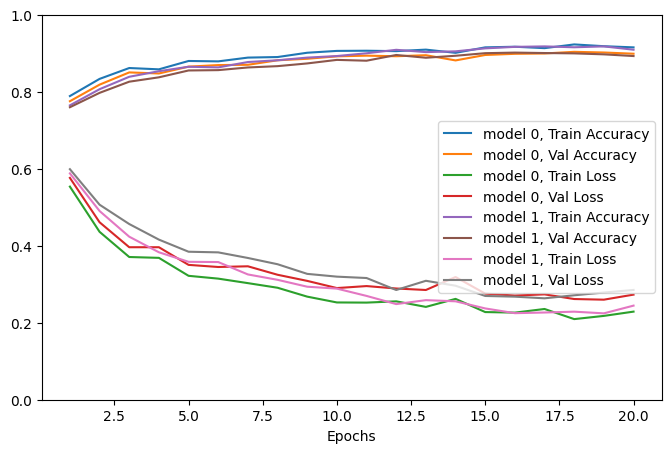

In [2]:
models = [CNN_Simple(input_ch=3, n_filters=16, out_size=5), CNN_Dense(input_ch=3, n_filters=16, out_size=5)]
trainers = [Trainer(D), Trainer(D)]
for model, T in zip(models, trainers):
    T.setup(model,learning_rate=1e-2, weight_decay=1e-3, max_epochs=20, batch_size=2*2*256)
    T.train_model(model)

# model = CNN_Simple(input_ch=3, n_filters=16)
# T = Trainer(D)
# T.setup(model, learning_rate=1e-2, weight_decay=1e-3, batch_size=2*5*256, max_epochs=30)
# T.train_model(model)
plot_train(trainers)
test_accuracy(D, models)

Train, test and validation data normalized to:
[1. 1.]
[1.0011533  1.00731495]
[1.00011294 1.01125842]
Using Device:  cpu , dtype:  torch.float32

Raw data shape:  (7497, 2, 32) 
Labels shape:  (7497,) 
Unique labels:  [0 1 2] 
Shape of test set: (1125, 2, 32) 
Shape of train set: (5416, 2, 32) 
Shape of validation set: (956, 2, 32) 
Fraction of single class in test set:  0.31377777777777777 
dtype of inputs:  torch.float32


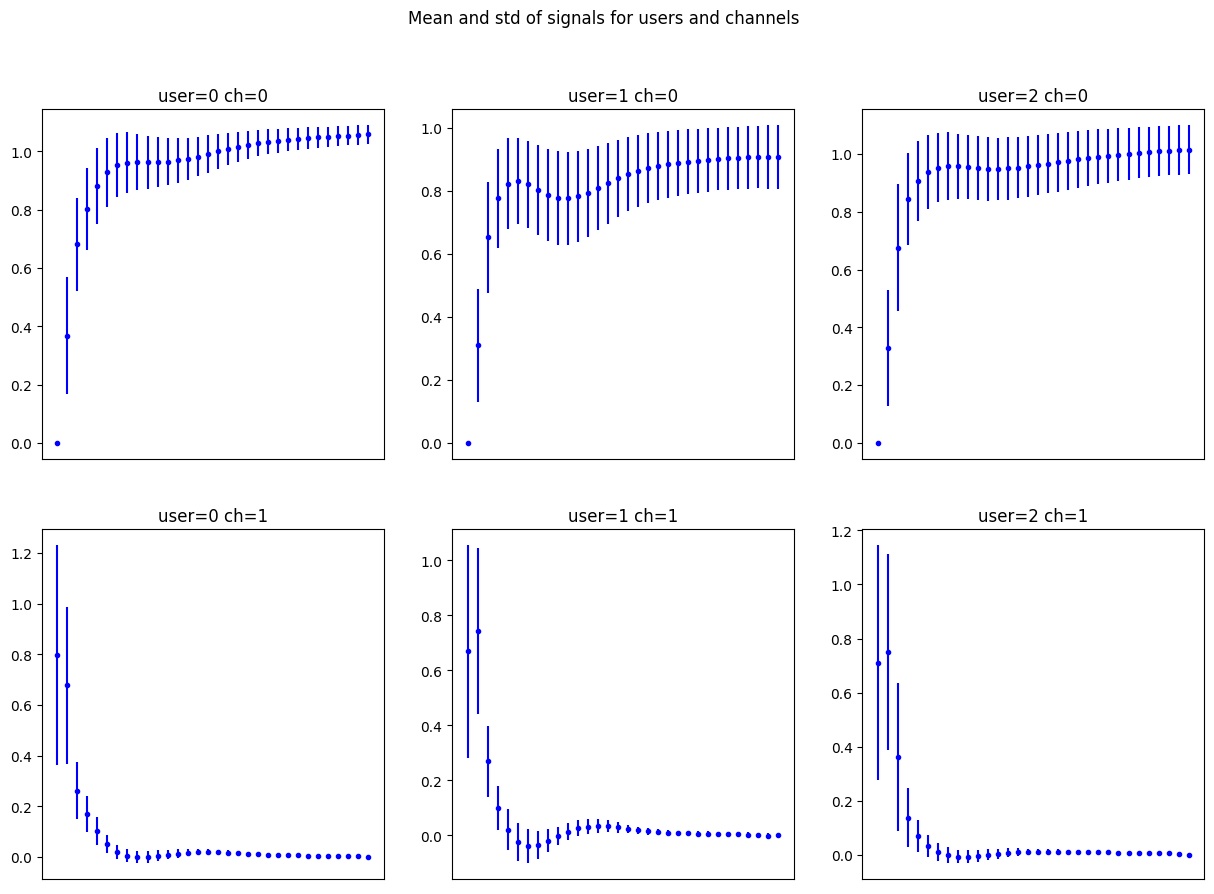

In [1]:
# Look at some simple transforms
from core_functions import Data, Trainer, plot_train, test_accuracy
from networks import CNN_Simple, CNN_Dense
dataPath = "./second_collection_triggs_rels_32.npz"
D = Data(dataPath, triggers=True, releases=False, transforms=True)
D.split()
D.normalize()
D.tensors_to_device()
D.print_shapes()
D.plot_data()

End of epoch 1:loss_tr=0.598, loss_val=0.577, train=73.1%, val=75.5%
End of epoch 2:loss_tr=0.457, loss_val=0.421, train=80.5%, val=82.8%
End of epoch 3:loss_tr=0.374, loss_val=0.332, train=84.9%, val=85.8%
End of epoch 4:loss_tr=0.327, loss_val=0.305, train=87.4%, val=86.7%
End of epoch 5:loss_tr=0.296, loss_val=0.281, train=88.7%, val=88.9%
End of epoch 6:loss_tr=0.274, loss_val=0.249, train=89.1%, val=89.7%
End of epoch 7:loss_tr=0.278, loss_val=0.275, train=89.0%, val=89.2%
End of epoch 8:loss_tr=0.278, loss_val=0.267, train=88.3%, val=88.7%
End of epoch 9:loss_tr=0.301, loss_val=0.295, train=87.7%, val=87.4%
End of epoch 10:loss_tr=0.244, loss_val=0.238, train=90.8%, val=90.5%
End of epoch 11:loss_tr=0.233, loss_val=0.222, train=91.2%, val=89.7%
End of epoch 12:loss_tr=0.259, loss_val=0.250, train=89.8%, val=89.3%
End of epoch 13:loss_tr=0.252, loss_val=0.227, train=90.5%, val=90.3%
End of epoch 14:loss_tr=0.226, loss_val=0.241, train=91.0%, val=90.9%
End of epoch 15:loss_tr=0.221

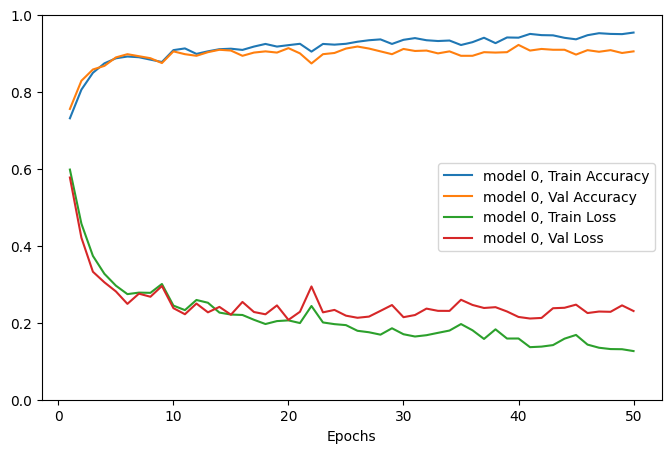

In [2]:
model = CNN_Simple(input_ch=2, n_filters=16)
T = Trainer(D)
T.setup(model, learning_rate=1e-2, weight_decay=1e-3, batch_size=2*256, max_epochs=50)
T.train_model(model)
plot_train([T])
test_accuracy(D, [model])

In [3]:
# # Longer intervals of time
from core_functions import Data, Trainer, plot_train, test_accuracy
from networks import CNN_Simple, CNN_64 
dataPath = "./second_collection_triggs_rels_64.npz"
D = Data(dataPath, triggers=True, releases=False)
D.split()
D.normalize()
D.tensors_to_device()
D.print_shapes()

Train, test and validation data normalized to:
[1.]
[0.9996899]
[0.9993976]
Using Device:  cpu , dtype:  torch.float32

Raw data shape:  (6103, 1, 64) 
Labels shape:  (6103,) 
Unique labels:  [0 1 2] 
Shape of test set: (916, 1, 64) 
Shape of train set: (4408, 1, 64) 
Shape of validation set: (779, 1, 64) 
Fraction of single class in test set:  0.38209606986899564 
dtype of inputs:  torch.float32


End of epoch 1:loss_tr=0.864, loss_val=0.889, train=59.1%, val=59.9%
End of epoch 2:loss_tr=0.744, loss_val=0.735, train=67.0%, val=67.0%
End of epoch 3:loss_tr=0.644, loss_val=0.631, train=70.9%, val=69.7%
End of epoch 4:loss_tr=0.571, loss_val=0.565, train=75.8%, val=75.6%
End of epoch 5:loss_tr=0.548, loss_val=0.537, train=75.8%, val=75.4%
End of epoch 6:loss_tr=0.503, loss_val=0.510, train=78.3%, val=79.6%
End of epoch 7:loss_tr=0.447, loss_val=0.468, train=82.2%, val=81.6%
End of epoch 8:loss_tr=0.402, loss_val=0.423, train=83.6%, val=83.2%
End of epoch 9:loss_tr=0.421, loss_val=0.444, train=81.9%, val=81.4%
End of epoch 10:loss_tr=0.384, loss_val=0.396, train=84.0%, val=84.3%
End of epoch 11:loss_tr=0.333, loss_val=0.370, train=87.0%, val=85.9%
End of epoch 12:loss_tr=0.325, loss_val=0.349, train=87.2%, val=86.5%
End of epoch 13:loss_tr=0.320, loss_val=0.343, train=86.5%, val=86.4%
End of epoch 14:loss_tr=0.273, loss_val=0.297, train=89.4%, val=88.8%
End of epoch 15:loss_tr=0.270

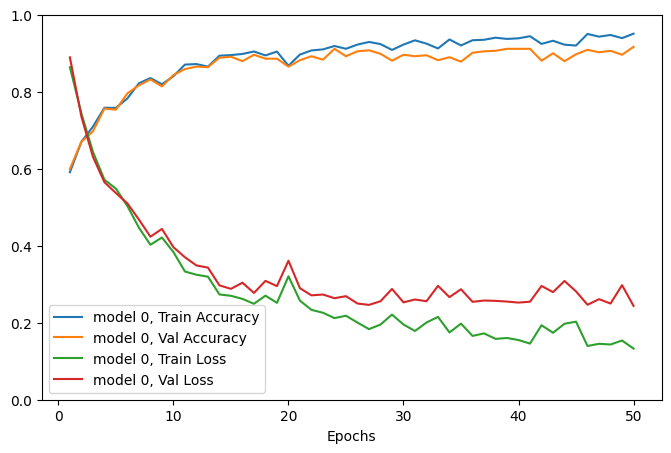

In [4]:
model = CNN_64(input_ch=1, n_filters=16)
T = Trainer(D)
T.setup(model, learning_rate=1e-2, weight_decay=1e-3, batch_size=2*256, max_epochs=50)
T.train_model(model)
plot_train([T])
test_accuracy(D, [model])